In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import networkx as nx

from sklearn import preprocessing
from sklearn import utils

# Disable annoying warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [92]:
df = pd.read_csv("nba_player_data.csv")
df = df.dropna()
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,...,0.7,2.4,3.1,1.7,0.6,0.4,0.9,2.7,8.8,2010
2,LaMarcus Aldridge,PF,24,POR,78,78,37.5,7.4,15.0,0.495,...,2.5,5.6,8.0,2.1,0.9,0.6,1.3,3.0,17.9,2010
3,Joe Alexander,SF,23,CHI,8,0,3.6,0.1,0.8,0.167,...,0.3,0.4,0.6,0.3,0.1,0.1,0.0,1.1,0.5,2010
4,Malik Allen,PF,31,DEN,51,3,8.9,0.9,2.3,0.397,...,0.7,0.9,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2010
5,Ray Allen*,SG,34,BOS,80,80,35.2,5.8,12.2,0.477,...,0.6,2.6,3.2,2.6,0.8,0.3,1.6,2.3,16.3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,0.578,...,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,2022
8297,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
8299,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022


In [99]:
Efficiency = df.PTS + df.TRB + df.AST + df.STL + df.BLK - (df.FGA - df.FG) - (df.FTA - df.FT) - df.TOV
df.insert(29, "EFF", Efficiency)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Year
0,Arron Afflalo,SG,24,DEN,82,75,27.1,3.3,7.1,0.465,...,2.4,3.1,1.7,0.6,0.4,0.9,2.7,8.8,9.6,2010
2,LaMarcus Aldridge,PF,24,POR,78,78,37.5,7.4,15.0,0.495,...,5.6,8.0,2.1,0.9,0.6,1.3,3.0,17.9,19.6,2010
3,Joe Alexander,SF,23,CHI,8,0,3.6,0.1,0.8,0.167,...,0.4,0.6,0.3,0.1,0.1,0.0,1.1,0.5,0.8,2010
4,Malik Allen,PF,31,DEN,51,3,8.9,0.9,2.3,0.397,...,0.9,1.6,0.3,0.2,0.1,0.4,1.3,2.1,2.4,2010
5,Ray Allen*,SG,34,BOS,80,80,35.2,5.8,12.2,0.477,...,2.6,3.2,2.6,0.8,0.3,1.6,2.3,16.3,14.9,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8296,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,0.578,...,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,9.5,2022
8297,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,0.465,...,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,9.8,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,27.2,2022
8299,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,0.526,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,9.0,2022


Data Splitting

In [100]:
players_C = df[df.Pos == "C"]
players_PG = df[df.Pos == "PG"]
players_SG = df[df.Pos == "SG"]
players_SF = df[df.Pos == "SF"]
players_PF = df[df.Pos == "PF"]

players_PG.tail(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF,Year
8251,Brad Wanamaker,PG,32,TOT,23,2,13.9,1.2,3.3,0.364,...,1.4,1.7,2.4,0.3,0.3,1.0,2.0,3.6,5.1,2022
8252,Brad Wanamaker,PG,32,IND,22,1,13.3,1.2,3.3,0.361,...,1.3,1.6,2.2,0.2,0.3,1.0,1.9,3.5,4.6,2022
8254,Duane Washington Jr.,PG,21,IND,48,7,20.2,3.6,8.9,0.405,...,1.6,1.7,1.8,0.5,0.1,1.2,1.4,9.9,7.2,2022
8264,Russell Westbrook,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,...,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5,20.0,2022
8265,Coby White,PG,21,CHI,61,17,27.5,4.6,10.6,0.433,...,2.7,3.0,2.9,0.5,0.2,1.1,2.2,12.7,12.0,2022
8273,Lindell Wigginton,PG,23,MIL,19,0,10.5,1.4,3.2,0.426,...,1.2,1.3,1.2,0.3,0.1,0.6,0.9,4.2,3.9,2022
8274,Brandon Williams,PG,22,POR,24,16,26.7,4.4,11.8,0.372,...,2.3,3.1,3.9,1.0,0.4,2.4,2.2,12.9,10.3,2022
8277,Lou Williams,PG,35,ATL,56,0,14.3,2.2,5.7,0.391,...,1.3,1.6,1.9,0.5,0.1,0.8,0.9,6.3,5.9,2022
8286,Cassius Winston,PG,23,WAS,7,0,5.6,0.6,1.6,0.364,...,0.1,0.1,1.0,0.0,0.0,0.4,1.3,2.0,1.7,2022
8298,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,0.460,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,27.2,2022


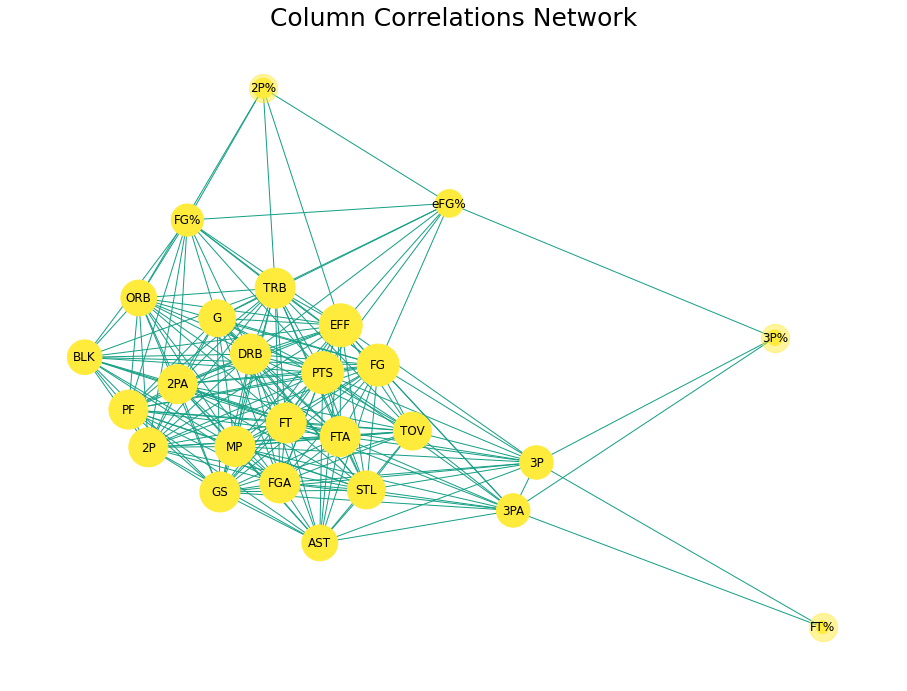

In [102]:
# Column Correlations Network
main_color = "#16a085"
strong_main_color = "#ffeb3b"
custom_colors = [strong_main_color, main_color]

thresh = 0.3
def correlation_network(data, corr_interval=[-0.9, 0.9], data_type="Train", node_color=custom_colors[1]):
    data = data
    corr = data.corr()
    corr = pd.melt(corr.reset_index(), id_vars="index")
    corr.columns = ["x", "y", "value"]
    high_corr = corr[((corr["value"] <= corr_interval[0]) | (corr["value"] >= corr_interval[1]))]
    high_corr = high_corr[(high_corr["value"] != 1)].reset_index(drop=True)
    sources = list(high_corr.x.unique())
    targets = list(high_corr.y.unique())
    plt.figure(figsize=(16, 12))
    g = nx.from_pandas_edgelist(high_corr, source="x", target="y") 
    layout = nx.spring_layout(g, iterations=50, k=0.6, seed=1337)
    target_size = [g.degree(t) * 80 for t in targets]
    nx.draw_networkx_nodes(g, layout, nodelist=targets, node_size=target_size, node_color=node_color)
    nx.draw_networkx_nodes(g, layout, nodelist=sources, node_color=node_color, node_size=800, alpha=0.5)
    nx.draw_networkx_edges(g, layout, width=1, edge_color=custom_colors[1])
    target_dict = dict(zip(targets, targets))
    nx.draw_networkx_labels(g, layout, labels=target_dict)
    plt.axis("off")
    plt.title(f"Column Correlations Network", fontsize=25)
    plt.show()
correlation_network(data=df, corr_interval=[-thresh, thresh], data_type="Train", node_color=custom_colors[0])

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

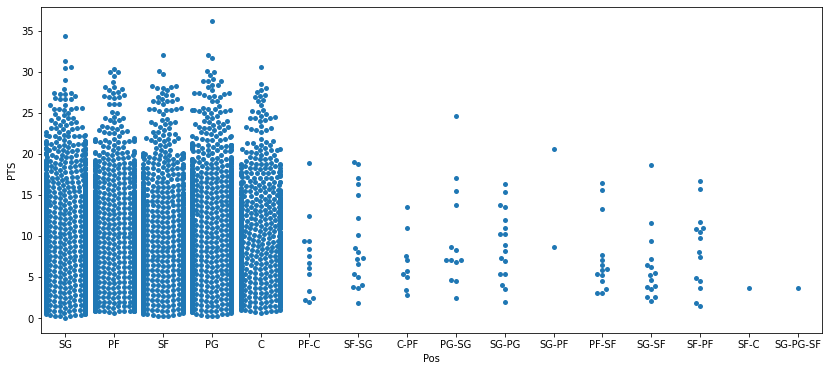

In [103]:
# points-position relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Pos"],
              y=df["PTS"])

In [104]:
# points mean per position
print("Points mean C: " + str(round(players_C.PTS.mean())))
print("Points mean PG: " + str(round(players_PG.PTS.mean())))
print("Points mean SG: " + str(round(players_SG.PTS.mean())))
print("Points mean PF: " + str(round(players_PF.PTS.mean())))
print("Points mean SF: " + str(round(players_SF.PTS.mean())))

Points mean C: 9
Points mean PG: 9
Points mean SG: 9
Points mean PF: 9
Points mean SF: 8


<AxesSubplot:xlabel='Pos', ylabel='EFF'>

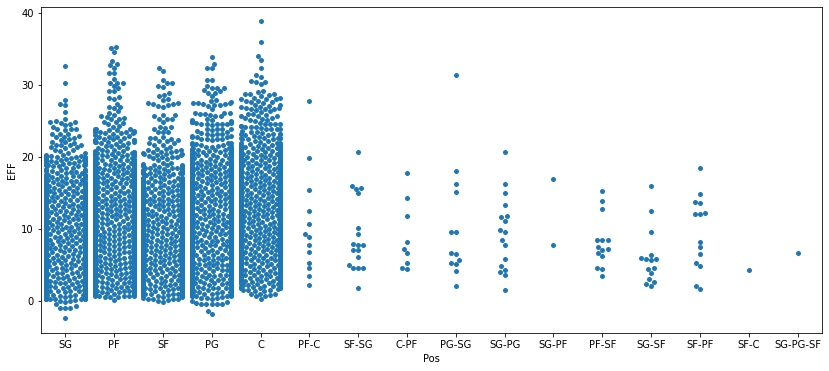

In [106]:
# efficiency-position relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Pos"],
              y=df["EFF"])

In [107]:
# efficiency mean per position
print("Efficiency mean C: " + str(round(players_C.EFF.mean())))
print("Efficiency mean PG: " + str(round(players_PG.EFF.mean())))
print("Efficiency mean SG: " + str(round(players_SG.EFF.mean())))
print("Efficiency mean PF: " + str(round(players_PF.EFF.mean())))
print("Efficiency mean SF: " + str(round(players_SF.EFF.mean())))

Efficiency mean C: 12
Efficiency mean PG: 10
Efficiency mean SG: 8
Efficiency mean PF: 10
Efficiency mean SF: 9


<AxesSubplot:xlabel='Age', ylabel='PTS'>

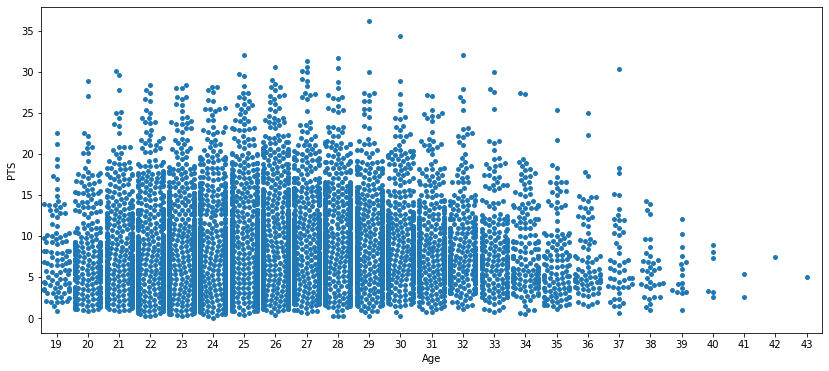

In [108]:
# points-age relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Age"],
              y=df["PTS"])

<AxesSubplot:xlabel='Year', ylabel='PTS'>

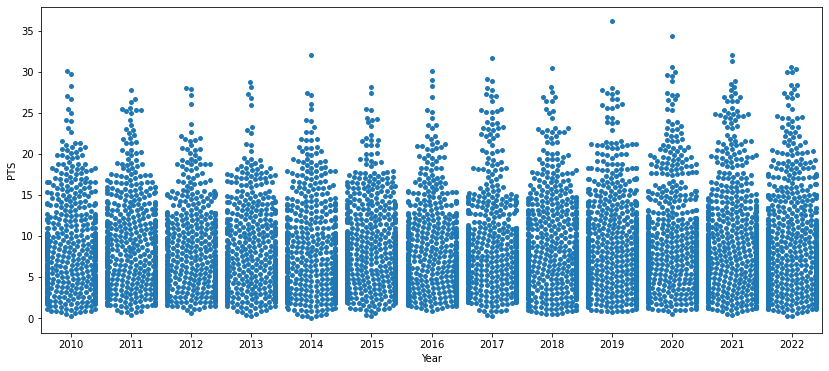

In [109]:
# points-year relation
plt.figure(figsize=(14,6))
sns.swarmplot(x=df["Year"],
              y=df["PTS"])

In [93]:
y = df["PTS"]
X = df.drop("PTS", axis=1)
X = X.drop("Player", axis=1)
#X = X.drop("Year", axis=1)
#X = X.drop("Pos", axis=1)
#X = X.drop("Tm", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.3, random_state = 0)

lab_enc = preprocessing.LabelEncoder()
encoded_y_train = lab_enc.fit_transform(y_train)
encoded_y_train

array([116,  91, 189, ...,   8, 170,  48], dtype=int64)

In [94]:
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(encoded_y_train))

continuous
multiclass
multiclass


In [95]:
ordinal_order = [["PG", "SG", "SF", "PF", "C",'SG-PF', 'SF-SG', 'PG-SG', 'PF-SF', 'SF-PF', 'SG-PG', 'PF-C', 'SF-C', 'C-PF', 'SG-SF', 'SG-PG-SF'], 
["DEN", "GSW", "NYK", 'CHI', 'BRK', 'BOS', 'NJN', 'MEM', 'LAL', 'ORL', 'DAL', 'POR', 'TOT', 'DET', 'TOR', 'CHA', 'NOH', 'SAC', 'LAC', 'UTA', 'HOU', 
'WAS', 'CHO', 'OKC', 'SAS', 'ATL', 'PHI', 'PHO', 'NOP', 'IND', 'MIL', 'MIA', 'CLE', 'MIN']]

In [96]:
from sklearn.compose import make_column_transformer
transformer = make_column_transformer((preprocessing.OrdinalEncoder(categories=ordinal_order), ["Pos", "Tm"]), remainder = "passthrough").fit(X_train)

In [97]:
encoded_x_train = transformer.transform(X_train)
encoded_x_test = transformer.transform(X_test)

In [98]:
clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=100, random_state=0)
clf2 = RandomForestClassifier(n_estimators=100, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, encoded_x_train, encoded_y_train, scoring="accuracy", cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.08 (+/- 0.00) [Logistic Regression]
Accuracy: 0.10 (+/- 0.01) [Random Forest]
Accuracy: 0.07 (+/- 0.01) [naive Bayes]
Accuracy: 0.08 (+/- 0.01) [Ensemble]
